In [87]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [88]:
train_dir = "/Users/shukurullomeliboyev2004/Machine-learnings/strong junior/Foundation modul/cats-dogs/train"
test_dir = "/Users/shukurullomeliboyev2004/Machine-learnings/strong junior/Foundation modul/cats-dogs/test"
img_width = 180
img_height =180

In [89]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale = 1./255

)


train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_height, img_width),
        batch_size=32,
        class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_height, img_width),
        batch_size=32,
        class_mode='binary'
)

Found 25000 images belonging to 2 classes.
Found 700 images belonging to 2 classes.


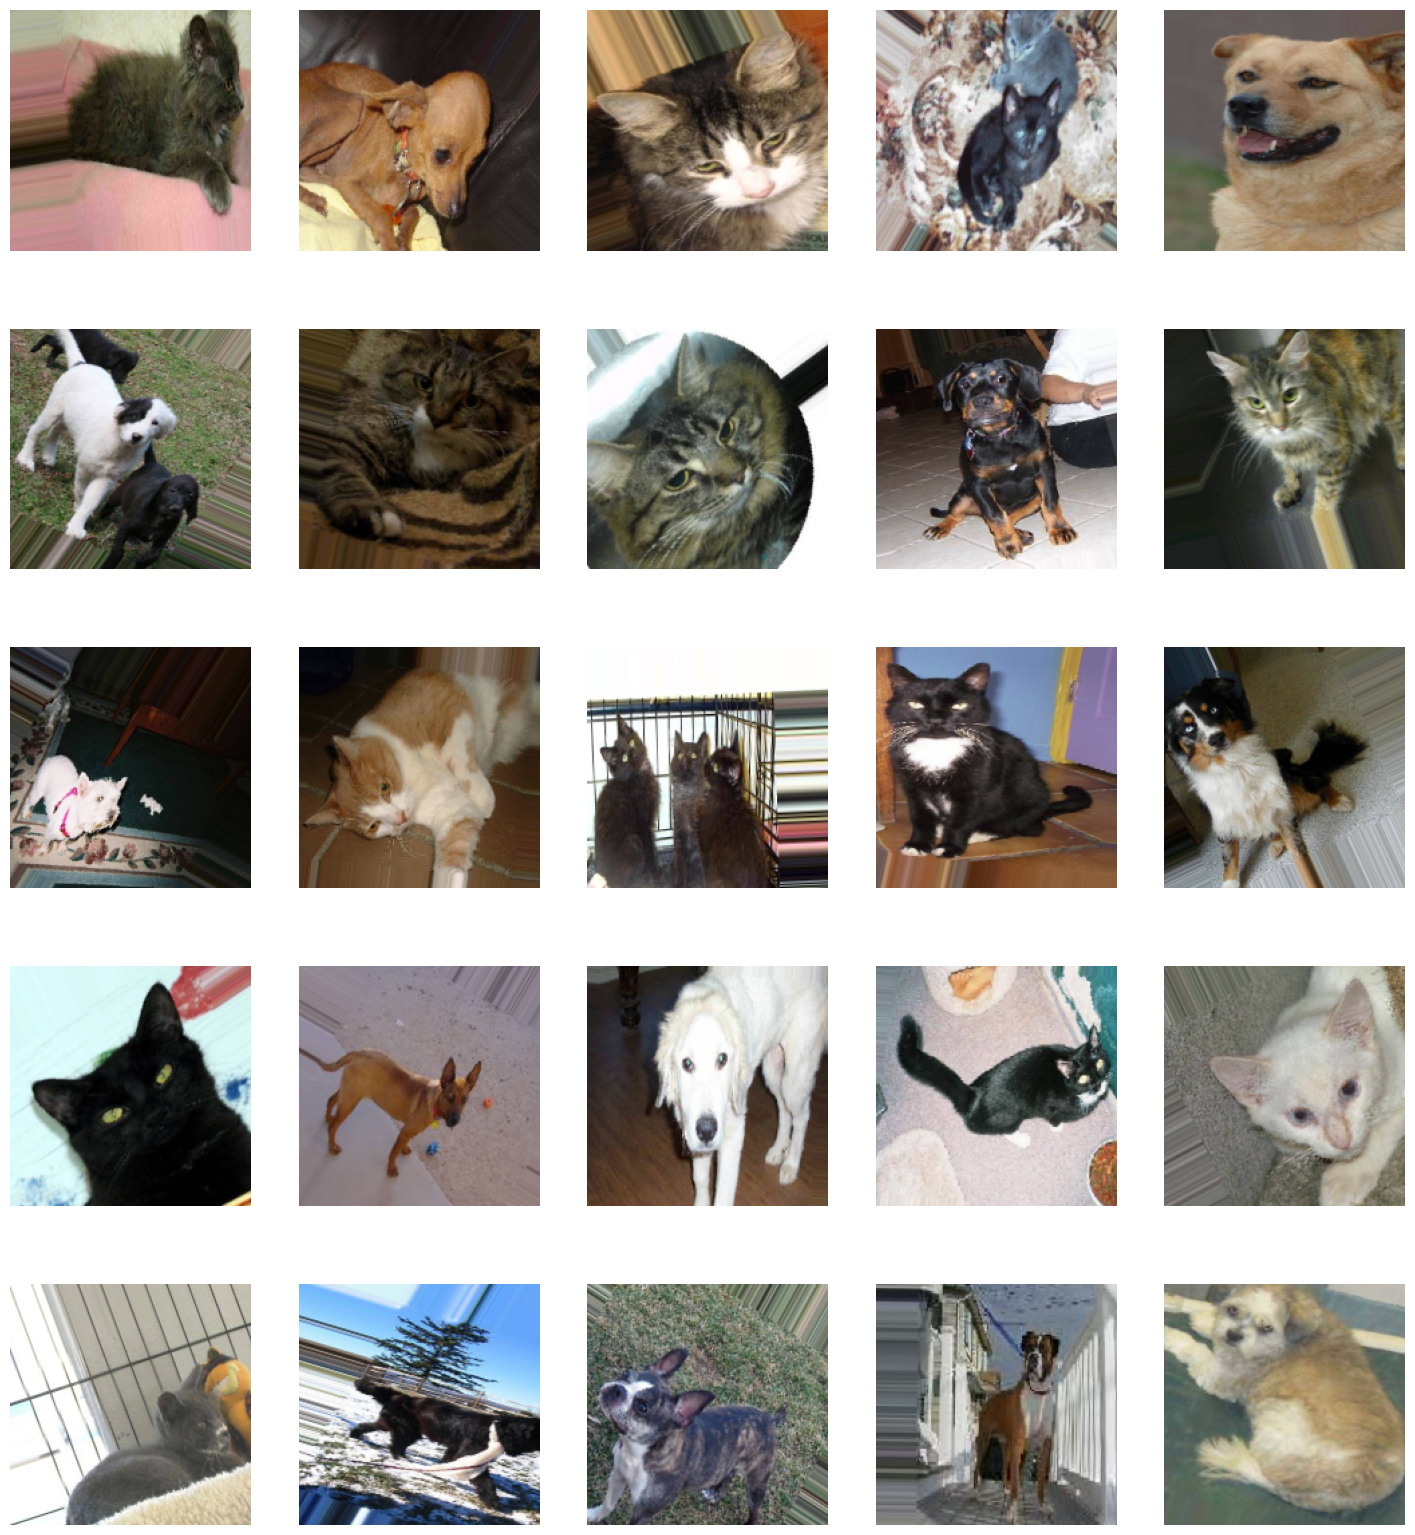

In [90]:
plt.figure(figsize = (18,20))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.axis(False)
    plt.imshow(train_generator[1][0][i])



plt.show()

In [100]:
model = models.Sequential([
    layers.Conv2D(filters = 32, kernel_size = 3,activation = 'relu', input_shape =(img_width,img_height,3)),
    layers.Conv2D(filters = 64,kernel_size = 3, activation = 'relu'),
    layers.MaxPooling2D(pool_size = 2),
    layers.Conv2D(filters = 128,kernel_size = 3, activation = 'relu'),
    layers.MaxPooling2D(pool_size = 2),
    layers.Flatten(),
    layers.Dense(32, activation = 'relu'),
    layers.Dense(1, activation ='sigmoid')
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 conv2d_10 (Conv2D)          (None, 176, 176, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 88, 88, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 86, 86, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 43, 43, 128)       0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 236672)           

In [101]:
optimizer = keras.optimizers.Adam(learning_rate= 0.001)
loss = keras.losses.BinaryCrossentropy()

model.compile(loss= loss, 
              optimizer=optimizer,
              metrics = 'accuracy')

In [102]:
history = model.fit(train_generator, epochs=10,validation_data=test_generator,)

Epoch 1/10
567/782 [====================>.........] - ETA: 6:14 - loss: 0.6771 - accuracy: 0.5704